# Campo rotante
## Modelo de ejemplo/experimento virtual

En este experimento virtual se busca mostrar el teorema de Ferraris. El cual se enuncia a continuación:

<div class="alert alert-block alert-info">
<b>Teorema: </b>Es posible producir un campo magnético giratorio, a partir de tres devanados desfasados 120º eléctricos en el espacio, por los que se introducen corrientes desfasadas 120º en el tiempo.
</div>

Por lo tanto en una máquina rotante trifásica se toman consideraciones geométricas y contructivas para obtener tres bobinados desfasados $120^{\circ}$ eléctricos en el espacio. A continuación se muestra una posible configuración.

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, FloatText
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.artist import Artist  
import matplotlib.animation


file = open("Bobinas.png", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=497,
    height=154,
)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01`\x00\x00\x00\xb9\x08\x02\x00\x00\x00\x99ErH\x00\…

Las bobinas $AA'$, $BB'$ y $CC'$ se alimentan a su vez con un sistema trifásico equilibrado de corrientes $I_A$, $I_B$ e $I_C$ las cuales se representan como se muestra a continuación.

$$I_A = \hat{I} cos (\omega t)$$
    
$$I_B = \hat{I} cos (\omega t - 120^{\circ})$$
    
$$I_C = \hat{I} cos (\omega t - 240^{\circ})$$

Cada una de estas corrientes recorre la bobina correspondiente, produciendo pues una f.m.m. pulsante en intensidad, pero de dirección constante, pues las bobinas están fijas al estator.
Estas f.m.m. se pueden expresar como:

$$\mathscr{F}_A = \hat{\mathscr{F}} cos (\omega t) cos(\theta)$$
    
$$\mathscr{F}_B = \hat{\mathscr{F}} cos (\omega t - 120^{\circ}) cos(\theta - 120^{\circ})$$
    
$$\mathscr{F}_C = \hat{\mathscr{F}} cos (\omega t - 240^{\circ}) cos(\theta - 240^{\circ})$$

Una vez más, vale la pena recordar que en las últimas expresiones, los ángulos son 
_grados eléctricos_.

Estas expresiones se pueden trabajar para obtener la f.m.m. total:

$$\mathscr{F}_{(\theta, t)} = \frac{3}{2} \hat{\mathscr{F}} cos (\omega t - \theta)$$

$\mathscr{F}$ es una onda de f.m.m. que se mueve alrededor del entrehierro, es decir que $\mathscr{F}$ es una f.m.m. giratoria.

En el siguiente gráfico interactivo un deslizador controla el tiempo $t$ y el otro la elevación $\theta$ que se puede interpretar como un punto en el entrehierro en el cual se ubica una zonda de f.m.m.

In [2]:
f = 50 #[Hz]
global omega
omega = 2 * np.pi * f#plt.show()

def h(t, Theta):
    fig, ax1 = plt.subplots(ncols=1, subplot_kw=dict(projection='polar'))
    #fig.set_visible(False)

    estator = plt.Circle((0.0, 0.0), 1, transform=ax1.transData._b, color="steelblue", alpha=0.75, hatch = '|', zorder = 0)
    ax1.add_artist(estator)

    rotorBlanco = plt.Circle((0.0, 0.0), 0.5, transform=ax1.transData._b, color="white", alpha=1, hatch = '/', zorder = 1)
    ax1.add_artist(rotorBlanco)
    rotor = plt.Circle((0.0, 0.0), 0.5, transform=ax1.transData._b, color="steelblue", alpha=0.75, hatch = '/', zorder = 2)
    ax1.add_artist(rotor)

    RAD = np.array([0.85, 0.85, 0.85])
    ANG = np.array([np.pi/2, np.pi*(2/3+1/2), np.pi*(1/2-2/3)])
    CLR = np.array(['r', 'g', 'b'])
    # Plotting point using sactter method
    c = ax1.scatter(ANG, RAD, c=CLR, s=40, cmap='hsv', alpha = 1, zorder = 10)

    RADp = np.array([0.85, 0.85, 0.85])
    ANGp = np.array([-np.pi/2, np.pi*(2/3-1/2), np.pi*(-1/2-2/3)])
    CLRp = np.array(['r', 'g', 'b'])
    # Plotting point using sactter method
    cp = ax1.scatter(ANGp, RADp, c=CLRp, s=40, cmap='hsv', alpha = 1, marker = "x", zorder = 11)

    #global theta
    #global r
    theta, r = np.mgrid[0:2*np.pi:50j, 0.5:0.75:2j]

    Fmm = np.cos((np.linspace(0, 2*np.pi, 100) - omega*t)).reshape(theta.shape)
    
    fmm = ax1.pcolormesh(theta, r, Fmm, alpha = 1, zorder = 25.0, shading = 'gouraud')
    
    fmm.remove()
    
    fmm = ax1.pcolormesh(theta, r, Fmm, alpha = 1, zorder = 30.0, shading = 'gouraud')
    
    fig.canvas.draw()
    fig.set_visible(True)
    ax1.set_ylim([0, 1])
    ax1.set_yticklabels([])
    #return (fig)

interact(h, t = widgets.FloatSlider(min=0, max=0.02, step=0.0002, value=0), Theta = widgets.FloatSlider(min = 0, max = 2*np.pi, step = 2*np.pi/100));

interactive(children=(FloatSlider(value=0.0, description='t', max=0.02, step=0.0002), FloatSlider(value=0.0, d…

Esta onda de f.m.m. varía cosenoidalmente con el tiempo, cuando se la observa desde un punto fijo del entrehierro, y en un instante dado, tiene también una distribución cosenoidal en el espacio, alrededor del entrehierrro. Se dice que esta f.m.m. es una onda que se mueve alrededor del entrhierro, es decir es una f.m.m. giratoria y es producto exclusivamente de las corrientes alternas que circulan por las bobinas.
A continuación se presentan un grafico interactivo donde se puede seleccionar un instante de tiempo y observar, en representación fasorial, como se obtiene la f.m.m giratoria representada mediante un fasor.

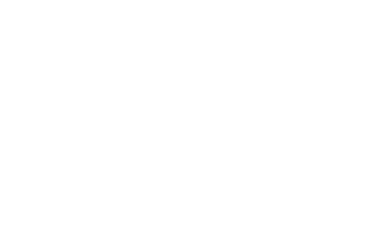

interactive(children=(Dropdown(description='omegat', options=(('0°', 0), ('120°', 2.0943951023931953), ('240°'…

In [3]:
global fig2
global ax21
global ax22

fig2 = plt.figure()
fig2.set_visible(False)
ax21 = fig2.add_subplot(211)
#omega = 2*np.pi*50
global vec_t
vec_t = np.linspace(-0.01, 0.01, 100)
ia = np.cos(omega*vec_t)
ib = np.cos(omega*vec_t - 2*np.pi/3)
ic = np.cos(omega*vec_t - 4*np.pi/3)

def Fia(t):
    p_i = i_p = np.array([np.cos(omega*t), np.cos(omega*t - 2*np.pi/3), np.cos(omega*t - 4*np.pi/3)])
    return(p_i)

ax22 = fig2.add_subplot(212, projection='polar')

ax22.grid(False)
ax22.set_ylim([0, 1])
ax22.set_yticklabels([])
ax22.set_xticklabels([])

estator = plt.Circle((0.0, 0.0), 1, transform=ax22.transData._b, color="steelblue", alpha=0.75, hatch = '|', zorder = 0)
ax22.add_artist(estator)

rotorBlanco = plt.Circle((0.0, 0.0), 0.75, transform=ax22.transData._b, color="white", alpha=1, hatch = '/', zorder = 1)
ax22.add_artist(rotorBlanco)
rotor = plt.Circle((0.0, 0.0), 0.5, transform=ax22.transData._b, color="steelblue", alpha=0.75, hatch = '/', zorder = 2)
ax22.add_artist(rotor)

t_p = np.array([0, 0, 0])
i_p = Fia(0)
CLR = np.array(['r', 'g', 'b'])
# Plotting point using sactter method
global _p
_p = ax21.scatter(t_p, i_p, c=CLR, s=40, cmap='hsv', alpha = 1, zorder = 10)

def FEj2(omegat):
    global _p
    global vec_t
    fig2 = plt.figure()
    ax21 = fig2.add_subplot(211)
    ax22 = fig2.add_subplot(212, projection='polar')
    
    ax21.plot(vec_t, ia, c = 'r')
    ax21.plot(vec_t, ib, c = 'g')
    ax21.plot(vec_t, ic, c = 'b')
    
    ax22.grid(False)
    ax22.set_ylim([0, 1])
    ax22.set_yticklabels([])
    ax22.set_xticklabels([])

    estator = plt.Circle((0.0, 0.0), 1, transform=ax22.transData._b, color="steelblue", alpha=0.75, hatch = '|', zorder = 0)
    ax22.add_artist(estator)

    rotorBlanco = plt.Circle((0.0, 0.0), 0.75, transform=ax22.transData._b, color="white", alpha=1, hatch = '/', zorder = 1)
    ax22.add_artist(rotorBlanco)
    rotor = plt.Circle((0.0, 0.0), 0.5, transform=ax22.transData._b, color="steelblue", alpha=0.75, hatch = '/', zorder = 2)
    ax22.add_artist(rotor)

    _p.remove()
    _p = ax21.scatter(np.array([omegat/omega, omegat/omega, omegat/omega]), Fia(omegat/omega), c=CLR, s=40, cmap='hsv', alpha = 1, zorder = 10)

    Baa = np.cos(omegat)
    Bbb = np.cos(omegat - np.pi * 2/3)
    Bcc = np.cos(omegat - np.pi * 4/3)

    if Baa>=0:
        ax22.quiver(0,0, 0, Baa, color='red', angles="xy", scale_units='xy', scale=1., zorder = 15)
    if Baa<0:
        ax22.quiver(0,0, np.pi, -Baa, color='red', angles="xy", scale_units='xy', scale=1., zorder = 15)

    if Bbb>=0:
        ax22.quiver(0,0, np.pi*2/3, Bbb, color='green', angles="xy", scale_units='xy', scale=1., zorder = 15)
    if Bbb<0:
        ax22.quiver(0,0, np.pi*5/3, -Bbb, color='green', angles="xy", scale_units='xy', scale=1., zorder = 15)

    if Bcc>=0:
        ax22.quiver(0,0, np.pi*4/3, Bcc, color='blue', angles="xy", scale_units='xy', scale=1., zorder = 15)
    if Bcc<0:
        ax22.quiver(0,0, np.pi*7/3, -Bcc, color='blue', angles="xy", scale_units='xy', scale=1., zorder = 15)
    #fig2.canvas.draw()
    #fig2.set_visible(True)
    
    #return (fig2, omegat)

#FEj2(0)

interact(FEj2, omegat=[('0°', 0), ('120°', 2*np.pi/3), ('240°', -2*np.pi/3), ('30°', np.pi/6)]);


Como podemos ver, la f.m.m. resultante es la suma vectorial de las f.m.m.s de cada bobinado en todo momento, siendo la disposición geométrica de los devanados en combinbación con las corrientes de un sistema trifásico que producen finalmente una f.m.m. rotante. A continuación se puede ver una animación de la misma.

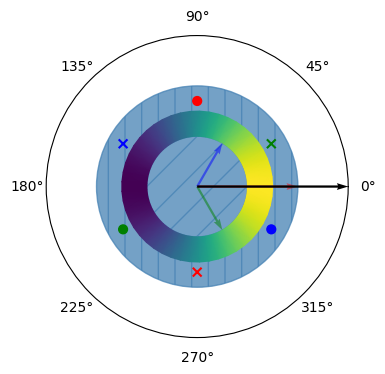

In [4]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 100  
plt.ioff()
fig = plt.figure()
fig.set_visible(False)
ax = fig.add_subplot(1, 1, 1, polar=True)

def animate(t):
    fig.set_visible(True)
    plt.cla()
    estator = plt.Circle((0.0, 0.0), 1, transform=ax.transData._b, color="steelblue", alpha=0.75, hatch = '|', zorder = 0)
    ax.add_artist(estator)

    rotorBlanco = plt.Circle((0.0, 0.0), 0.5, transform=ax.transData._b, color="white", alpha=1, hatch = '/', zorder = 1)
    ax.add_artist(rotorBlanco)
    rotor = plt.Circle((0.0, 0.0), 0.5, transform=ax.transData._b, color="steelblue", alpha=0.75, hatch = '/', zorder = 2)
    ax.add_artist(rotor)

    RAD = np.array([0.85, 0.85, 0.85])
    ANG = np.array([np.pi/2, np.pi*(2/3+1/2), np.pi*(1/2-2/3)])
    CLR = np.array(['r', 'g', 'b'])
    # Plotting point using sactter method
    c = ax.scatter(ANG, RAD, c=CLR, s=40, cmap='hsv', alpha = 1, zorder = 10)

    RADp = np.array([0.85, 0.85, 0.85])
    ANGp = np.array([-np.pi/2, np.pi*(2/3-1/2), np.pi*(-1/2-2/3)])
    CLRp = np.array(['r', 'g', 'b'])
    # Plotting point using sactter method
    cp = ax.scatter(ANGp, RADp, c=CLRp, s=40, cmap='hsv', alpha = 1, marker = "x", zorder = 11)
    
    tt = 0.0004*t
    
       
    f = 50 #[Hz]
    omega = 2 * np.pi * f
    
    Fmmaa = np.cos(omega * tt)
    Fmmbb = np.cos(omega * tt - np.pi * 2/3)
    Fmmcc = np.cos(omega * tt - np.pi * 4/3)
    FmmSUM = 3/2
    #print([Baa, Bbb, Bcc])
    
    
    if Fmmaa>=0:
        ax.quiver(0,0, 0, Fmmaa, color='red', angles="xy", scale_units='xy',
                  scale=1., alpha = 0.5, zorder = 5)
    if Fmmaa<0:
        ax.quiver(0,0, np.pi, -Fmmaa, color='red', angles="xy", scale_units='xy',
                  scale=1., alpha = 0.5, zorder = 5)

    if Fmmbb>=0:
        ax.quiver(0,0, np.pi*2/3, Fmmbb, color='green', angles="xy", scale_units='xy',
                  scale=1., alpha = 0.5, zorder = 5)
    if Fmmbb<0:
        ax.quiver(0,0, np.pi*5/3, -Fmmbb, color='green', angles="xy", scale_units='xy',
                  scale=1., alpha = 0.5, zorder = 5)

    if Fmmcc>=0:
        ax.quiver(0,0, np.pi*4/3, Fmmcc, color='blue', angles="xy", scale_units='xy', 
                  scale=1., alpha = 0.5, zorder = 5)
    if Fmmcc<0:
        ax.quiver(0,0, np.pi*7/3, -Fmmcc, color='blue', angles="xy", scale_units='xy',
                  scale=1., alpha = 0.5, zorder = 5)

    if FmmSUM>=0:
        ax.quiver(0,0, 0 + omega*tt, FmmSUM, color='black', angles="xy", scale_units='xy', scale=1., zorder = 5)
    if FmmSUM<0:
        ax.quiver(0,0, np.pi + omega*tt, -FmmSUM, color='black', angles="xy", scale_units='xy', scale=1., zorder = 5)

    theta, r = np.mgrid[0:2*np.pi:50j, 0.5:0.75:2j]

    FmmAni = np.cos((np.linspace(0, 2*np.pi, 100) - omega*tt)).reshape(theta.shape)
    fmmAni = plt.pcolormesh(theta, r, FmmAni, alpha = 1, zorder = 4, shading = 'gouraud')
    
    ax.set_ylim(0,1.5)
    ax.set_yticks([])
    

matplotlib.animation.FuncAnimation(fig, animate, frames=51, interval = 50)

Esta animación representa un ciclo temporal completo de las corrientes que alimentan los devanados. En este caso, al ser una representación de una máquina con un solo par de polos ($numero de polos = 2p$) un ciclo completo de $360^\circ$ eléctricos del sistema trifásico de corrientes coincide con un giro de $360^\circ$ geométricos.